In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

import czifile
from pathlib import Path
import os
from skimage import morphology, exposure, filters
from skimage.feature import canny
from skimage.measure import regionprops, regionprops_table, label
from scipy import ndimage, misc

In [40]:
# replace with a configuration file
work_dir = '/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test'
filename = 'pho_gthb_20210427_1.czi'
channel_dict = {'DAPI': 0, 'TL':1, 'gt':2, 'pho':3, 'hb':4}
bkgd_signal = 150
channel_list = ['DAPI', 'gt', 'pho', 'hb'] #keep for iteration
shape_channel = 'DAPI'
ap_channel = 'DAPI'


In [41]:
directory = work_dir
os.chdir(work_dir)
path = os.path.join(directory, filename)

# for filename in os.listdir(directory):
#     if filename.endswith(".czi"):
#         print(os.path.join(directory, filename))
#         path = os.path.join(directory, filename)
#         get_AP(path, filename)
#     else:
#         continue

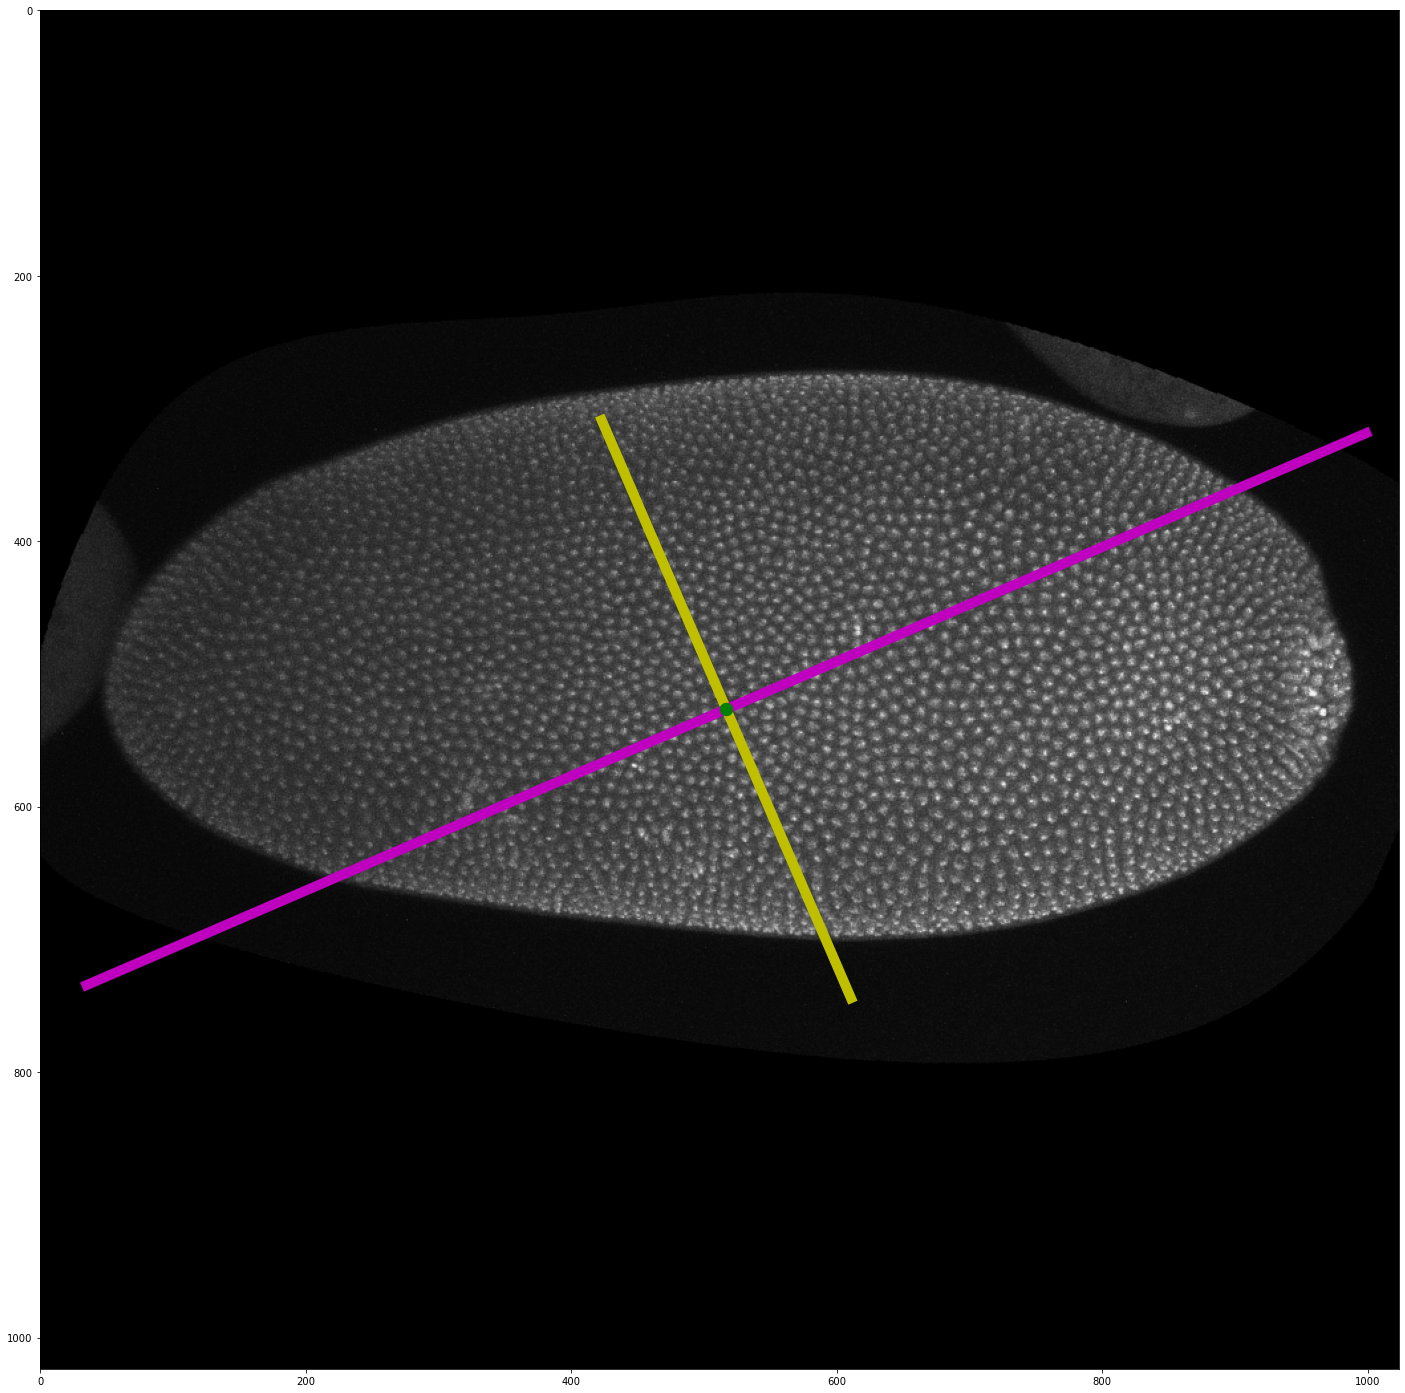

In [42]:
#def get_AP (path, filename):
czi = czifile.imread(filename)
img=czi.squeeze()
data = {}
for channel in channel_list:
    data[channel] = img[channel_dict[channel],...]
    
xdim = img.shape[2]
ydim = img.shape[3]
z_plane = img.shape[1] / 2
z_plane = round(z_plane)

max_AP = data[ap_channel].max(0) # this will be how to pick AP axis
zshape = data[shape_channel][z_plane,:,:]

    #make the mask of the embryo shape
zshape = exposure.adjust_gamma(zshape)
zshape = filters.apply_hysteresis_threshold(zshape, bkgd_signal, np.max(zshape)-1)
zshape = morphology.binary_closing(zshape)
zshape_edge = canny(zshape, sigma=2.0, low_threshold=0.55, high_threshold=0.8) 


    #get_dimensions
emb_label= label(zshape.astype(np.uint8))
emb_regions = regionprops(zshape.astype(np.uint8))

for props in emb_regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    long_axis = props.major_axis_length
    short_axis = props.minor_axis_length
    minr, minc, maxr, maxc = props.bbox

    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length #top
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x3 = x0 - math.cos(orientation) * 0.5 * props.minor_axis_length #bottom
    y3 = y0 + math.sin(orientation) * 0.5 * props.minor_axis_length
        
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length
    x4 = x0 + math.sin(orientation) * 0.5 * props.major_axis_length
    y4 = y0 + math.cos(orientation) * 0.5 * props.major_axis_length

rotation_axis = 90 - (orientation * 180/math.pi)
rotated_AP = ndimage.rotate(max_AP, rotation_axis, reshape=False)
rotated_AP = exposure.adjust_gamma(rotated_AP)

fig, ax = plt.subplots(figsize=(25,25))
ax.imshow(rotated_AP, cmap=plt.cm.gray)
ax.plot((x3, x1), (y3, y1), '-y', linewidth=10) #minor axis line
ax.plot((x4, x2), (y4, y2), '-m', linewidth=10) #major axis line
ax.plot(x0, y0, '.g', markersize=25)

    #time to save
os.makedirs(path[:-4], exist_ok=True)
fig.savefig(os.path.join(path[:-4], f"{filename[:-4]}_APcheck"))

In [11]:
#def load_embryo(path, filename): # ask Jeff how to write the proper syntax here.  
czi = czifile.imread(filename)
img=czi.squeeze()
data = {}
for channel in channel_list:
    data[channel] = img[channel_dict[channel],...]
    
xdim = img.shape[2]
ydim = img.shape[3]

In [12]:
#def set_zplane(xdim, ydim):

z_plane = img.shape[1] / 2
z_plane = round(z_plane)
#z_plane_top = z_plane-3
#z_plane_bottom = z_plane+3

In [14]:
#def get_Embdim(data)

max_AP = data[ap_channel].max(0) # this will be how to pick AP axis
zshape = data[shape_channel][z_plane,:,:]

    #make the mask of the embryo shape
zshape = exposure.adjust_gamma(zshape)
zshape = filters.apply_hysteresis_threshold(zshape, bkgd_signal, np.max(zshape)-1)
zshape = morphology.binary_closing(zshape)
zshape_edge = canny(zshape, sigma=2.0, low_threshold=0.55, high_threshold=0.8) 

In [15]:
#ef get_dim(zshape):

emb_label= label(zshape.astype(np.uint8))
emb_regions = regionprops(zshape.astype(np.uint8))

for props in emb_regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    long_axis = props.major_axis_length
    short_axis = props.minor_axis_length
    minr, minc, maxr, maxc = props.bbox

    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length #top
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x3 = x0 - math.cos(orientation) * 0.5 * props.minor_axis_length #bottom
    y3 = y0 + math.sin(orientation) * 0.5 * props.minor_axis_length
    
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length
    x4 = x0 + math.sin(orientation) * 0.5 * props.major_axis_length
    y4 = y0 + math.cos(orientation) * 0.5 * props.major_axis_length

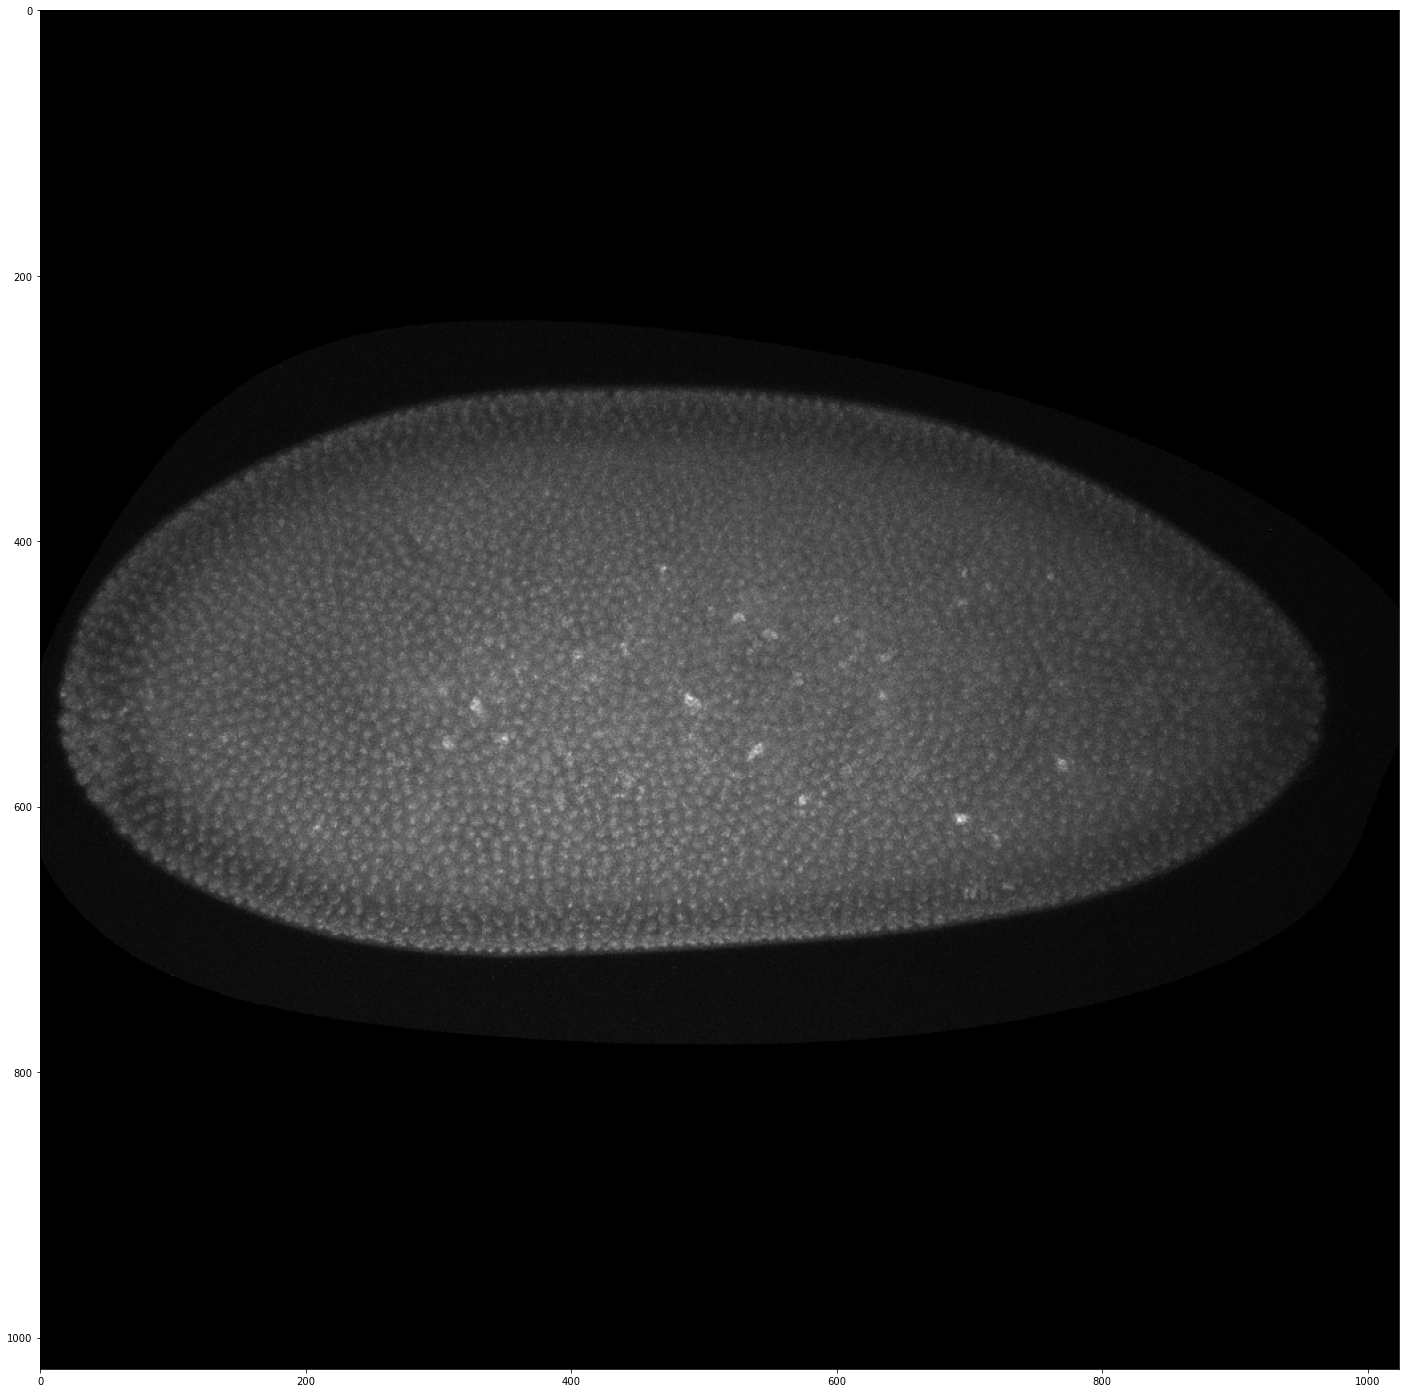

In [24]:
#def rotate_Emb(rotation_axis, zshape):

rotation_axis = 90 - (orientation * 180/math.pi)
rotated_AP = ndimage.rotate(max_AP, rotation_axis, reshape=False)
rotated_AP = exposure.adjust_gamma(rotated_AP)

fig, ax = plt.subplots(figsize=(25,25))
ax.imshow(rotated_AP, cmap=plt.cm.gray)

#time to save
#os.makedirs(path[:-4], exist_ok=True)
fig.savefig(os.path.join(path[:-4], f"{filename[:-4]}_APcheck"))